### Microbes data analysis

This is the dataset for 10 different microbes (Spirogyra, Volvox, Pithophora, Yeast, Raizopus, Penicillum, Aspergillus, Diatom, Ulothix). Here we will do data analysis and build models.

### 1. Load libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #, GridsearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm # display progress of loops

### 2. Load data

In [3]:
data = pd.read_csv("F:/microbes.csv")
data.head(2)

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.7,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.1,1.310,7.99,Spirogyra
1,1,5.6,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.6,0.765,7.99,Spirogyra


### 3. Exploratory Data Analysis (EDA)

In [12]:
# Let's get the number of rows and columns in data
row_count = data.shape[0]
column_count = data.shape[1]
print('Row count is:', row_count)
print ('Column count is:', column_count)

Row count is: 30527
Column count is: 26


In [13]:
# Basic information of data including the null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30527 non-null  int64  
 1   Solidity         30527 non-null  float64
 2   Eccentricity     30527 non-null  float64
 3   EquivDiameter    30527 non-null  float64
 4   Extrema          30527 non-null  float64
 5   FilledArea       30527 non-null  float64
 6   Extent           30527 non-null  float64
 7   Orientation      30527 non-null  float64
 8   EulerNumber      30527 non-null  float64
 9   BoundingBox1     30527 non-null  float64
 10  BoundingBox2     30527 non-null  float64
 11  BoundingBox3     30527 non-null  float64
 12  BoundingBox4     30527 non-null  float64
 13  ConvexHull1      30527 non-null  float64
 14  ConvexHull2      30527 non-null  float64
 15  ConvexHull3      30527 non-null  float64
 16  ConvexHull4      30527 non-null  float64
 17  MajorAxisLen

Looks like there is one column that is labels as unnamed.

In [21]:
data.columns

Index(['Unnamed: 0', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms'],
      dtype='object')

In [24]:
data['Unnamed: 0'].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

##### Let's remove this form the data

In [26]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(2)

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.7,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.9,...,2.97,1.34,1.61,0.683,0.195,3.63,12.1,1.310,7.99,Spirogyra
1,5.6,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.2,...,5.47,1.52,1.52,1.010,0.215,6.01,20.6,0.765,7.99,Spirogyra


##### Confirm the removal of 'Unnammed: 0' column one more time

In [27]:
data.columns

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

##### Let's get the summary of statistics

In [28]:
data.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


#### Let's go through the stats by dividing it into two halves

In [29]:
data.iloc[:, :12].describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,2.085481,2.640499
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,2.166312,2.488448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,0.849000,1.150000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,1.500000,1.940000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,2.660000,3.380000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [30]:
data.iloc[:, 12:].describe()

,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,11.113760,11.113760,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,6.033357,6.033357,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.980000,5.980000,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,11.100000,11.100000,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,16.000000,16.000000,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


### 4. Data visualization

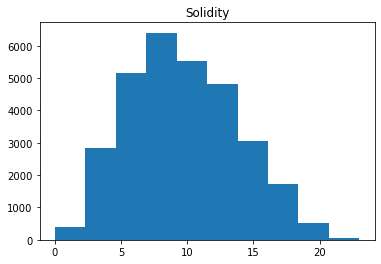

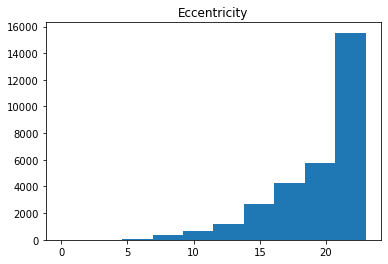

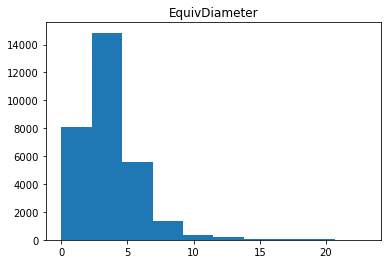

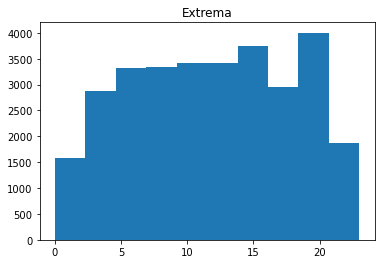

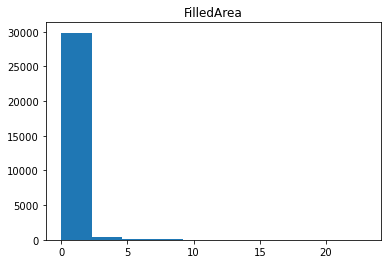

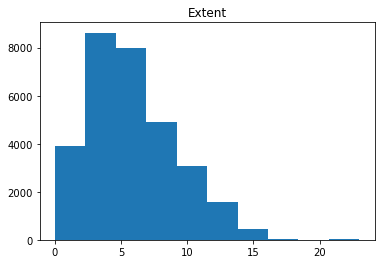

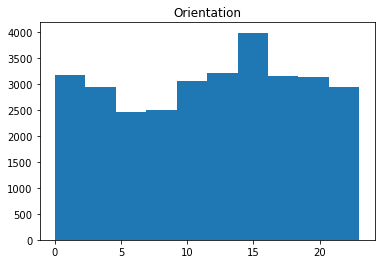

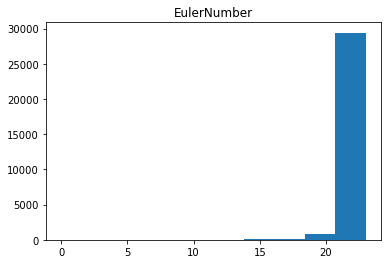

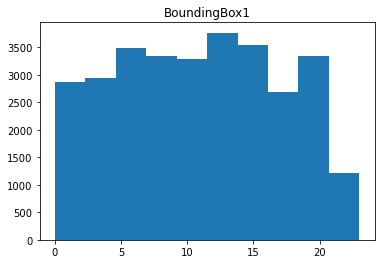

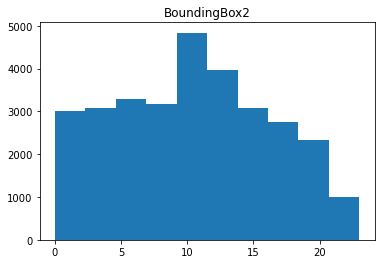

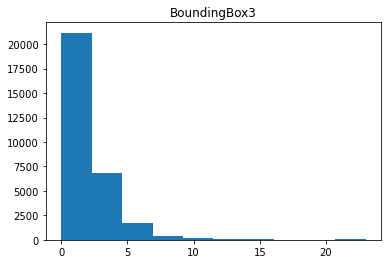

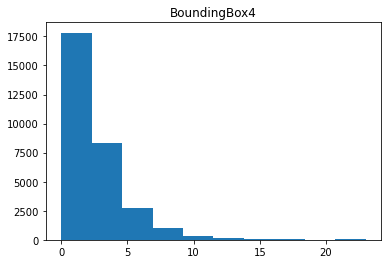

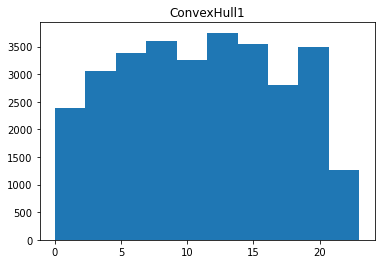

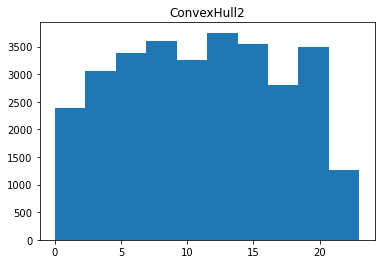

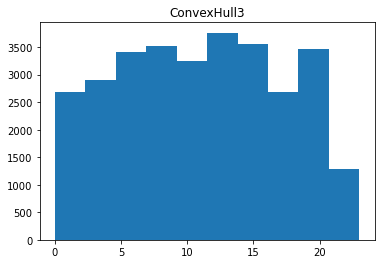

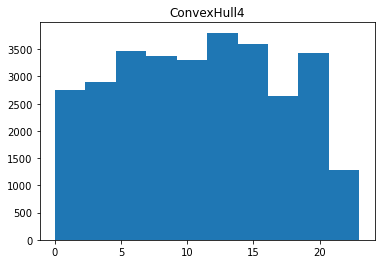

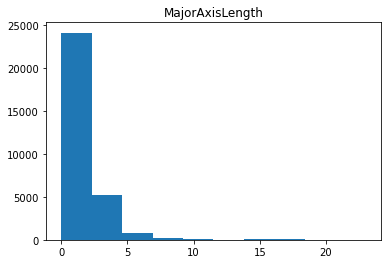

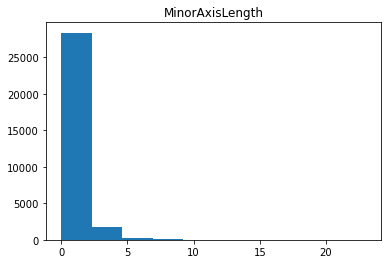

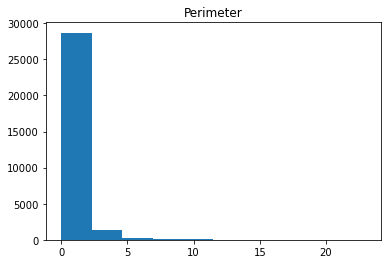

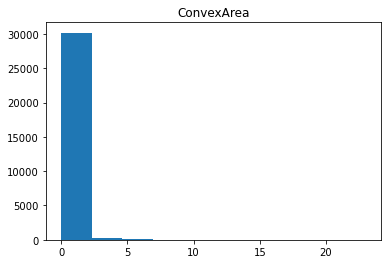

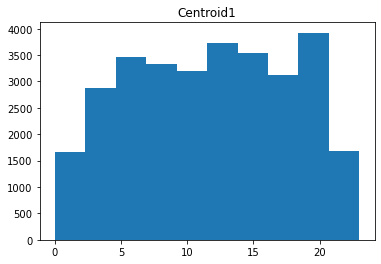

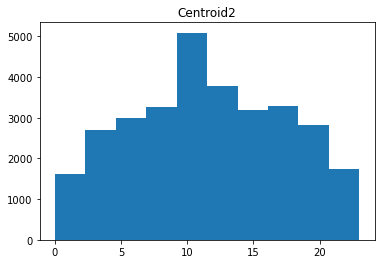

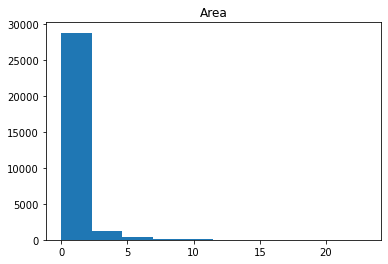

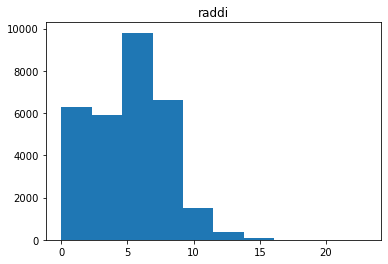

In [13]:
for col in data.columns[:-1]:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

In [44]:
# lets find unique elements of an array
# split data into separate groups for better analysis (groupby())
labels = data['microorganisms'].unique() 
label_counts = data.groupby(['microorganisms']).size()
labels.sort()

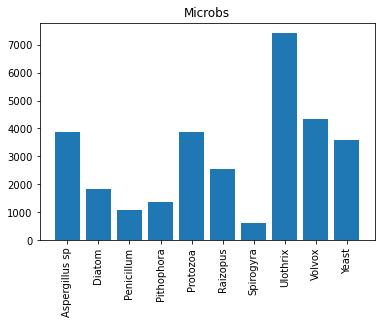

In [47]:
#plot a bar plot
plt.bar(labels, label_counts)
plt.xticks(rotation=90)
plt.title('Microbs')
plt.show()

### 5. Data Preprocessing

#### Normalize the data

In [66]:
# rescaling the numeric attributes into a 0 to 1 range
scaler = StandardScaler()
sc_data = scaler.fit_transform(data.iloc[:,:-1])
temp_y = data['microorganisms'].to_numpy()
sc_data = pd.DataFrame(np.hstack((sc_data, temp_y.reshape(-1, 1))), columns=data.columns)
sc_data.head(2)

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0.251578,-1.053782,0.812665,-1.343554,0.417081,0.707294,-1.460182,-0.084019,-1.304578,0.086349,...,-1.322303,-0.159493,0.48666,-0.127081,-0.061375,-1.347138,0.09573,0.433369,0.989394,Spirogyra
1,-1.003537,-0.335344,0.22917,-0.94488,-0.06402,-0.716907,1.041639,0.123689,-0.90413,1.518112,...,-0.911751,-0.051223,0.413149,0.156737,-0.040778,-0.952423,1.586816,-0.032279,0.989394,Spirogyra


In [67]:
sc_data = sc_data[(np.abs(stats.zscore(data.iloc[:,:-1])) <3).all(axis=1)]

In [68]:
sc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28772 entries, 0 to 30526
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Solidity         28772 non-null  object
 1   Eccentricity     28772 non-null  object
 2   EquivDiameter    28772 non-null  object
 3   Extrema          28772 non-null  object
 4   FilledArea       28772 non-null  object
 5   Extent           28772 non-null  object
 6   Orientation      28772 non-null  object
 7   EulerNumber      28772 non-null  object
 8   BoundingBox1     28772 non-null  object
 9   BoundingBox2     28772 non-null  object
 10  BoundingBox3     28772 non-null  object
 11  BoundingBox4     28772 non-null  object
 12  ConvexHull1      28772 non-null  object
 13  ConvexHull2      28772 non-null  object
 14  ConvexHull3      28772 non-null  object
 15  ConvexHull4      28772 non-null  object
 16  MajorAxisLength  28772 non-null  object
 17  MinorAxisLength  28772 non-null

#### Oversampling with SMOTE (Synthetic Minority Oversampling Technique)

In [69]:
from imblearn.over_sampling import SMOTE # redistribute the unbalanced data with over sampling

In [71]:
X = sc_data.drop(['microorganisms'], axis=1).to_numpy()
y = sc_data['microorganisms'].to_numpy()
sm = SMOTE(random_state=42)
X_train_transformed, y_train_transformed = sm.fit_resample(X,y)

In [72]:
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=42,
                                                 shuffle=True)

### 6. Baseline Models

In [73]:
# formate scoring output
def score_format(model):
    print(f'Accuracy: {round(model * 100, 2)} %')

#### K-Nearest Neighbors

In [74]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_format(knn.score(X_test, y_test))

Accuracy: 92.04 %


#### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
score_format(rf.score(X_test, y_test))

Accuracy: 98.46 %


#### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
score_format(gb.score(X_test, y_test))

Accuracy: 87.07 %


#### Multi-Layer Perceptron

In [81]:
mlp = MLPClassifier(max_iter = 1000)
mlp.fit(X_train, y_train)
score_format(mlp.score(X_test, y_test))

Accuracy: 84.52 %


### 7. Cross Validation

We will determine how well each model generalized on unseen data. Cross validation will treat entire dataset as a training and test set splitting into K equal parts, and altering training and test sets among those K-splits

In [82]:
models = [knn, rf, gb, mlp]

In [84]:
for model in models:
    scores = cross_val_score(estimator=model,
                             X=X,
                             y=y,
                             cv=10,
                             n_jobs=-1)
    print(f'CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV accuracy: 0.934 +/- 0.014
CV accuracy: 0.995 +/- 0.006
CV accuracy: 0.814 +/- 0.030
CV accuracy: 0.814 +/- 0.024


#### CV Scores
- KNN- CV accuracy: 0.934 +/- 0.014
- Random Forest- CV accuracy: 0.995 +/- 0.006
- Gradient boosting- CV accuracy: 0.814 +/- 0.030
- MLP- CV accuracy: 0.814 +/- 0.024

### Concluding remark

- Random forest is the best predictor with the highest accuacy and lowest standard deviation (0.995 +/- 0.006).